## 12. 회귀분석
### - 단순회귀모형
### - 중회귀모형
### - 모형의 선택
### - 모형의 타당성

* 회귀분석에 의해 변수 사이의 인과관계가 명확해지고 한 변수가 다른 변수에 끼치는 영향을 추정할 수 있음
* 모형 $\rightarrow$ 현실 세계에서 발생하는 복잡한 현상의 특징을 잘 포착하여 단순화한 것
* 회귀분석의 목적 $\rightarrow$ 복잡한 현상을 사람이 이해할 수 있을 정도의 간단한 구조로 충분히 설명할 수 있는 모형을 찾는 것이 목적

In [1]:
# 기존에 사용했던 라이브러리에 statsmodels를 추가
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
# 시용할 데이터 불러오기
df = pd.read_csv(r'E:\jupyter\누구나 파이썬 통계분석\ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


#### 1. 단순회귀모형
* 회귀분석(regression analysis) $\rightarrow$ 인과관계가 의심되는 복수의 변수를 사용하여 어느 변수로부터 다른 변수의 값을 예측하는 기법
  - 원인이 되는 변수 $\rightarrow$ 설명변수(explanatory variable) (= 독립변수; independent variable)
  - 결과가 되는 변수 $\rightarrow$ 반응변수(response variable) (= 종속변수; dependent variable)
* 단순회귀모형(simple regression model) $\rightarrow$ 설명변수와 반응변수가 1개씩인 가장 단순한 모델
* 회귀분석에서의 가설
  - $y = {\beta_0} + {\beta_1{x}}$를 가정
  - 그러나 데이터는 직선과 완전히 일치하지는 않음
  - 기본적인 관계는 직선상에 있다고 생각하고, 다른 요인에 관해서는 예측할 수 없는 확률적인 것이라고 생각
  - 예측할 수 없는 부분을 오차항(error term)이라고 함 $\rightarrow$ $\epsilon_i$
  - 다시... $Y_i = {\beta_0} + {\beta_1{x}} + \epsilon_i$  $(i=1,2,\dots,n)$
  - 회귀분석에서는 추가적으로 두 가지를 가정
    + 설명변수가 확률변수는 아니다
    + $\epsilon_i$는 서로 독립이고 $N(0,\sigma^2)$을 따른다
  - 위 가정에 의해 확률변수 $Y_i$는 서로 독립이고 $N({\beta_0} + {\beta_1}{x_i}, \sigma^2$을 따르는 것을 알 수 있음
  - 회귀분석은 이러한 가정을 기초로 표본인 $(x_1,Y_1),(x_2,Y_2),\dots,(x_n,Y_n)$으로부터 모수 $\beta_0$과 $\beta_1$을 추정함
  - 회귀직선(regression line): $\beta_0$과 $\beta_1$의 추정값 $\hat{\beta_0}$과 $\hat{\beta_1}$에 의해 생성되는 직선 $\rightarrow$ $y = \hat{\beta_0} + \hat{\beta_1}{x}$ 
  - $\hat{\beta_0}$과 $\hat{\beta_1}$은 회귀계수(regression coefficient)라고 함
* statsmodels에 의한 회귀분석
  - smf.ols 함수를 활용하여 설명변수와 반응변수의 관계를 나타낸 문자열과 DataFrame을 전달하고, 추가로 fit 메서드를 호출하여 실행할 수 있음
    + OLS = 최소제곱법(Ordinary Least Squares)
* 회귀계수
  - 점추정
  - 추정값이 생성한 직선 $y = \hat{\beta_0} + \hat{\beta_1}{x}$, 즉 회귀직선은 데이터 $(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)$에 가장 잘 들어맞는 직선
  - '데이터에 가장 잘 들어맞는 직선' $\rightarrow$ $x_i$로부터 예측된 모형의 예측값(predicted value) $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$와 실제의 데이터 $y_i$의 차이가 가장 작은 직선
  - 엄밀하게는 $y_i - \hat{y_i}$의 차이를 잔차(residual), 그 제곱합인 잔차제곱합(residual sum of squares; RSS) $\sum_i^n{\hat{\epsilon^2}}$이 더욱 작은 직선으로서 정의
  - 잔차제곱합을 최소화하는 $\hat{\beta_0}$과 $\hat{\beta_1}$을 구하는 방법을 최소제곱법이라고 함
  - 최소제곱법으로 구한 $\hat{\beta_0}$과 $\hat{\beta_1}$은 $\beta_0$과 $\beta_1$의 불편일치추정량이 됨

In [3]:
# 쪽지시험의 평균 점수: 설명변수, 기말고사 점수: 반응변수
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

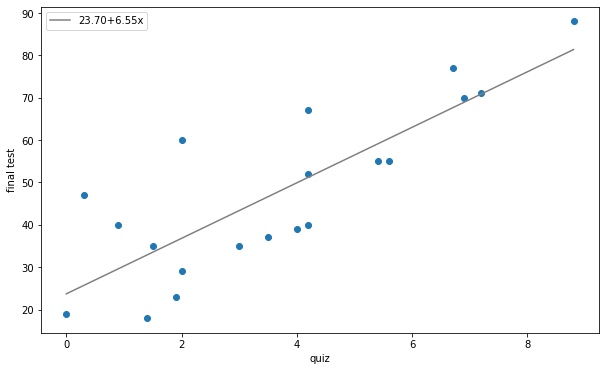

In [4]:
# 산점도와 회귀직선 그리기
poly_fit = np.polyfit(x,y,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [5]:
# OLS
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           8.59e-06
Time:                        23:43:13   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 각 행은 다음에 관한 분석 결과
  - Intercept: 절편 $\beta_0$
  - quiz: 기울기 $\beta_1$
* 각 열은 다음을 나타냄
  - coef: 회귀계수의 추정값
  - std err: 추정값의 표준차
  - t: 회귀계수에 관한 t검정통계량
  - P>$\left\lvert{t}\right\rvert$: 검정통계량의 p값
  - [0.025와 0.975]: 회귀계수의 95% 신뢰구간

In [6]:
# 최소제곱법으로 추정량 구하기
# 선형대수학이나 편미분에 관한 지식이 필요한 부분
# 하지만 Numpy로 간단하게 구현
X = np.array([np.ones_like(x),x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
# 최소제곱법 -> np.linalg.lstsq
# 첫 번째 인수가 설명변수인 X, 두 번째 인수가 반응변수인 y
# 첫 번째 반환값이 구하려는 추정량
beta0_hat, beta1_hat = np.linalg.lstsq(X,y)[0]
beta0_hat, beta1_hat

<ipython-input-7-5a011dc8d4d5>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X,y)[0]


(23.699495346731226, 6.553732606043085)

In [8]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

#### 2.중회귀모형

#### 3. 모형의 선택

#### 4. 모형의 타당성